In [1]:
import os
import numpy as np
import aocd
from aocd.models import Puzzle
from aocd import submit

In [2]:
current_day = 13
current_year = 2021
puzzle = Puzzle(year=current_year, day=current_day)
puzzle

<Puzzle(2021, 13) at 0x7fbcf16db610 - Transparent Origami>

In [20]:
coords, folds = puzzle.input_data.split('\n\n')
coords = coords.splitlines()
folds = folds.splitlines()
coords = np.array([np.int32(coord.split(',')) for coord in coords])
folds = [fold.replace('fold along ','').split('=') for fold in folds]
coords, folds

(array([[1101,  291],
        [ 221,  448],
        [1098,  383],
        ...,
        [  98,  408],
        [1193,  372],
        [ 565,   73]], dtype=int32),
 [['x', '655'],
  ['y', '447'],
  ['x', '327'],
  ['y', '223'],
  ['x', '163'],
  ['y', '111'],
  ['x', '81'],
  ['y', '55'],
  ['x', '40'],
  ['y', '27'],
  ['y', '13'],
  ['y', '6']])

# Part 1

In [37]:
num_cols, num_rows = np.max(coords,axis=0) - np.min(coords,axis=0) + 1
print(f"{num_cols = }, {num_rows = }")
grid = np.zeros((num_rows, num_cols), dtype=int)
for x,y in coords:
    grid[y,x] = 1

num_cols = 1311, num_rows = 895


In [38]:
fold_loc = 655
to_fold_over = grid[:,fold_loc+1:]
# flip horizontally
to_fold_over = to_fold_over[:,::-1]
assert to_fold_over.shape == grid[:,fold_loc-to_fold_over.shape[1]:fold_loc].shape
grid[:,fold_loc-to_fold_over.shape[1]:fold_loc] = grid[:,fold_loc-to_fold_over.shape[1]:fold_loc] | to_fold_over
grid = grid[:,:fold_loc]


In [40]:
grid.sum()

716

In [41]:
puzzle.answer_a = 716

That's the right answer!  You are one gold star closer to finding the sleigh keys. You got rank 370 on this star's leaderboard. [Continue to Part Two]


# Part 2

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
def do_fold(grid, fold_axis, fold_loc):
    if fold_axis == 'x':
        to_fold_over = grid[:,fold_loc+1:]
        # flip horizontally
        to_fold_over = to_fold_over[:,::-1]
        assert to_fold_over.shape == grid[:,fold_loc-to_fold_over.shape[1]:fold_loc].shape
        grid[:,fold_loc-to_fold_over.shape[1]:fold_loc] |= to_fold_over
        grid = grid[:,:fold_loc]
    else: # 'y'
        to_fold_over = grid[fold_loc+1:,:]
        # flip vertically
        to_fold_over = to_fold_over[::-1,:]
        assert to_fold_over.shape == grid[fold_loc-to_fold_over.shape[0]:fold_loc,:].shape
        grid[fold_loc-to_fold_over.shape[0]:fold_loc,:] |= to_fold_over
        grid = grid[:fold_loc,:]
    return grid

num_cols = 1311, num_rows = 895


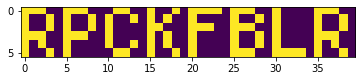

In [47]:
num_cols, num_rows = np.max(coords,axis=0) - np.min(coords,axis=0) + 1
print(f"{num_cols = }, {num_rows = }")
grid = np.zeros((num_rows, num_cols), dtype=int)
for x,y in coords:
    grid[y,x] = 1
for fold_axis, fold_loc in folds:
    grid = do_fold(grid,fold_axis, int(fold_loc))
plt.imshow(grid)

In [48]:
puzzle.answer_b = 'RPCKFBLR'

That's the right answer!  You are one gold star closer to finding the sleigh keys. You got rank 287 on this star's leaderboard.You have completed Day 13! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].
